In [1]:
from sklearn.datasets import fetch_mldata
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np

# Para imprimir los gráficos
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



# Formación Machine Learning - Parte 1

# Requisitos

- Conocimiento de programación, preferiblemente en Python
- Alguna familiaridad con Numpy, Pandas, Matplotlib/Seaborn/Bokeh (herramientas de visualización)
- Alguna familiaridad con Jupyter notebooks (todos los ejemplos son en Jupyter, así como esta presentación)
- Álgebra *muy* básica


# Agenda

1. Introducción al Aprendizage Automático
2. Datasets
3. Aprendizage Supervisado
4. Aprendizage No-Supervisado


# Introducción - Definición

Posiblemente la mejor definición de Aprendizaje Automático es:

> Un programa de ordenador se considera que aprende de la experiencia E con respecto a una tarea T, evaluado bajo una medida de rendimiento P, se el rendimiento en la ejecución de la tarea T, medida por P, mejora con la experiencia E

> Tom Mitchell, 1997

Algunos ejemplos que hemos visto ya hace tiempo son:

- OCRs
- Filtros anti-SPAM
- Detección de niveles de crédito y de fraude



# Introducción - Comparación con la programación clásica

La definición anterior permite ver claramente la diferencia entre la programación tradicional y la programación utilizando modelos de aprendizage automático.

El modelo tradicional sería algo como:

1. Definir el problema y los requerimientos
2. Escribir el código
3. Probar el código para verificar se cumple con los requerimientos
4. Si hay errores, analizarlos y corregirlos
5. Desplegar la solución



# Introducción - Comparación con la programación clásica

En un modelo con aprendizage automático nosotros o no sabemos definir el problema claramente o queremos ayudar en definirlo. Este proceso sería algo como:

1. Definir el problema (el mejor posible)
2. Utilizar un algoritmo de aprendizaje automático para aprender de los datos
3. Evaluar el rendimiento del aprendizaje
4. Si posible, ajustar parametros, modelo, etc para mejorar el rendimiento
5. Desplegar la solución

# Introducción - Aprendizaje Automático y Inteligencia Artificial

![Aprendizaje Automatico](Aprendizaje Automatico.png)
> Goodfellow, Bengio, Courville, 2017


# Introducción - Tipos de Aprendizaje Automatico

1. Aprendizaje Supervisado
  1. Clasificación
  1. Regresión
1. Aprendizaje No-Supervisado
  1. *Clustering* - Agrupación
  1. Aprendizaje de la representación
  1. Reducción de dimensionalidad / Visualización
  1. Detección de anomalías
1. Aprendizaje Reforzado
  1. Robótica
  1. Razonamiento (ejemplo juegos)

Hay algunas otras clasificaciones como por ejemplo aprendizaje basado en instancia y basado en modelo, etc.

# Introducción - Ejemplo

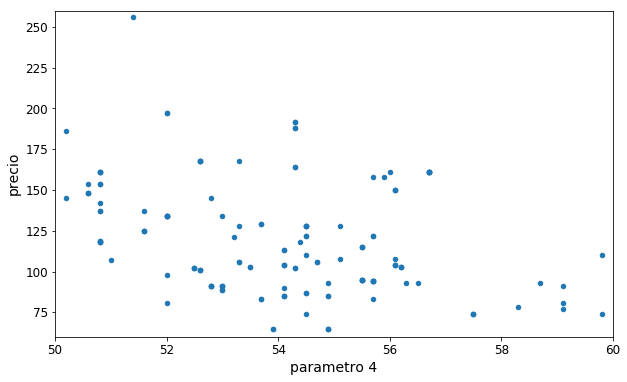

In [2]:
# Precios de coches de 1985 - EUA
data = fetch_mldata('regression-datasets auto_price')
df = pd.DataFrame(data.data, columns=['parametro 1','parametro 2','parametro 3','parametro 4'])
df['precio'] = pd.Series(data.target[1])

df.plot(kind='scatter', x="parametro 4", y='precio', figsize=(10,6))
plt.axis([50, 60, 60, 260])
plt.show()




# Introducción - Ejemplo

Modelo de Regresión lineal - $y=\theta *x+b$

In [3]:
# Modelo lineal
lin1 = linear_model.LinearRegression()
# Utilizando solamente el parametro 4
Xsample = np.c_[df["parametro 4"]]
ysample = np.c_[df["precio"]]
lin1.fit(Xsample[0:50], ysample[0:50])
t00, t10 = lin1.intercept_[0], lin1.coef_[0][0]
lin1.fit(Xsample[0:100], ysample[0:100])
t01, t11 = lin1.intercept_[0], lin1.coef_[0][0]
lin1.fit(Xsample, ysample)
t02, t12 = lin1.intercept_[0], lin1.coef_[0][0]

# Introducción - Ejemplo

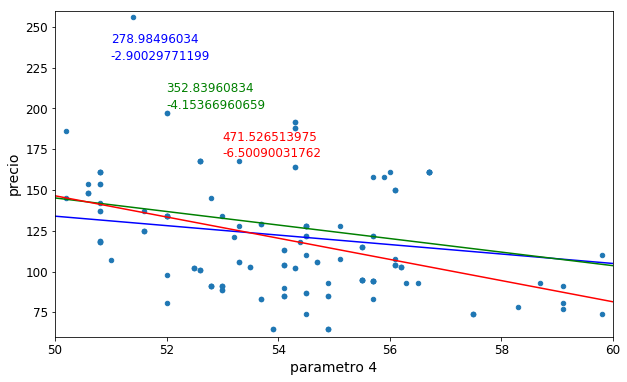

In [4]:
df.plot(kind='scatter', x="parametro 4", y='precio', figsize=(10,6))
X=np.linspace(50, 60, 1000)
plt.plot(X, t00 + t10*X, "b")
plt.plot(X, t01 + t11*X, "g")
plt.plot(X, t02 + t12*X, "r")
plt.text(51, 240, t00, fontsize=12, color="b")
plt.text(51, 230, t10, fontsize=12, color="b")
plt.text(52, 210, t01, fontsize=12, color="g")
plt.text(52, 200, t11, fontsize=12, color="g")
plt.text(53, 180, t02, fontsize=12, color="r")
plt.text(53, 170, t12, fontsize=12, color="r")
plt.axis([50, 60, 60, 260])
plt.show()

# Introducción - Ejemplo

Modelo de Regresión Polinomial - $y=\theta _{1} *x+\theta _{2}*x^{2}+\theta _{3}*x^{3}+...+b$

In [5]:
# Introduzco "features" polinomiales con 3 ejemplos
model = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model.fit(Xsample, ysample)
y0 = model.predict(X.reshape(-1,1))
model = make_pipeline(PolynomialFeatures(9), linear_model.LinearRegression())
model.fit(Xsample, ysample)
y1 = model.predict(X.reshape(-1,1))
model = make_pipeline(PolynomialFeatures(27), linear_model.LinearRegression())
model.fit(Xsample, ysample)
y2 = model.predict(X.reshape(-1,1))


# Introducción - Ejemplo

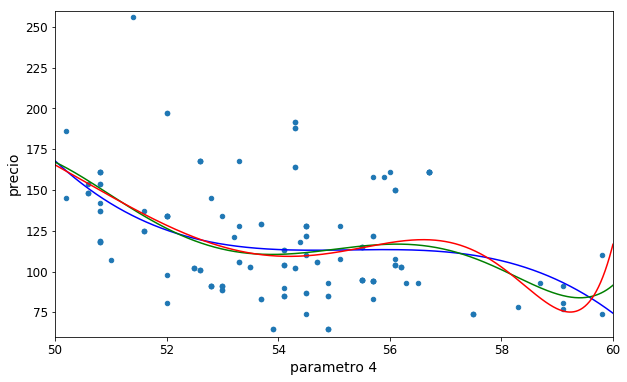

In [6]:
df.plot(kind='scatter', x="parametro 4", y='precio', figsize=(10,6))
plt.plot(X, y0, "b")
plt.plot(X, y1, "g")
plt.plot(X, y2, "r")
plt.axis([50, 60, 60, 260])
plt.show()

# Introducción - Principales retos

- Pequeña cantidad de datos para entrenamiento
- Baja *calidad* de los datos para entrenamiento (ejemplo datos no-representativos, ruido, errores)
- Selección de *features*
- *Overfitting* x *Underfitting*

## Apendice - Instalación del Entorno

En esta formación utilizamos Python con scikit-learn y Keras con Tensorflow

Para facilitar la instalación del entorno he utilizado el software [Anaconda](https://www.anaconda.com/download/) que debería funcionar igualmente para Windows, Unix y Mac. El ordenador utilizado era un Windows, pero entiendo que no debería ser diferente en Unix y Mac.

Trás la instalación de Anaconda, he creado un entorno virtual de forma que la instalación de los diversos paquetes para esta formación no afectaran el resto del entorno. Para instalar los paquetes, utilice:

> conda create virtualenv tensorflow

> conda install scikit-learn jupyter bokeh

> conda install tensorflow

> conda install keras

### Instalación con soporte a GPU

La instalación con soporte a GPU depende del ordenador y del sistema operativo. En en caso de un ordenador Windows con GPU Nvidia (que era el caso), es necesario ir al area de [Developer de Nvidia](https://developer.nvidia.com/cudnn) y bajar el software cuDNN y sus dependencias. Para los ejemplos de esta formación, la CPU debería ser suficiente.

Una vez instalado el cuDNN, se debería instalar la versión de Tensorflow con soporte a GPU. Diferentes versiones de Tensorflow requieren diferentes versiones del cuDNN con lo cual comprobar en los [requerimientos de instalación](https://www.tensorflow.org/install/install_windows#requirements_to_run_tensorflow_with_gpu_support) del Tensorflow la versión adecuada.

> conda install tensorflow-gpu
